Mounted at /content/drive
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3150 - loss: 41.9529 - val_accuracy: 0.2650 - val_loss: 22.6774
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2817 - loss: 21.7251 - val_accuracy: 0.2735 - val_loss: 10.1238
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3975 - loss: 6.6814 - val_accuracy: 0.4615 - val_loss: 4.1143
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6110 - loss: 2.3961 - val_accuracy: 0.4615 - val_loss: 3.4308
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5396 - loss: 2.1255 - val_accuracy: 0.4615 - val_loss: 2.9931
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5878 - loss: 2.0616 - val_accuracy: 0.4872 - val_loss: 2.6411
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6203 - loss: 1.8029 - val_accuracy: 0.4786 - val_loss: 2.4761
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5536 - loss: 1.6447 - val_accuracy: 0.5043 - val_loss:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620 (2.43 KB)

 Trainable params: 206 (824.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 414 (1.62 KB)

None
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix
[[384  32]
 [122  45]]


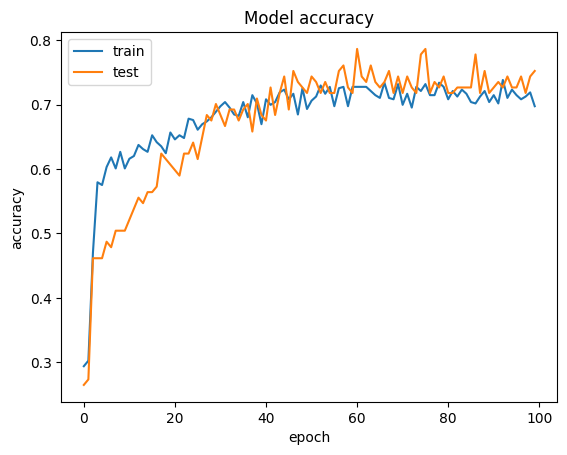

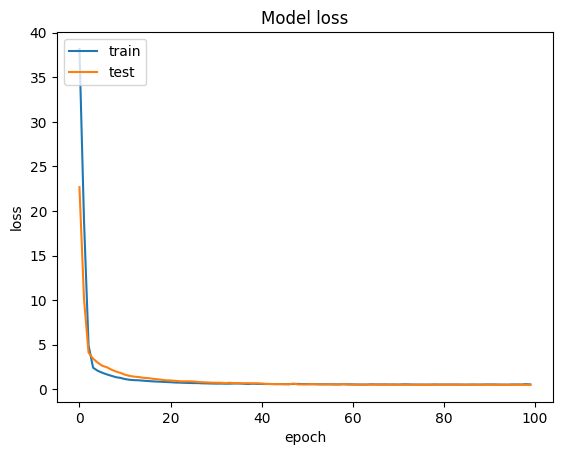

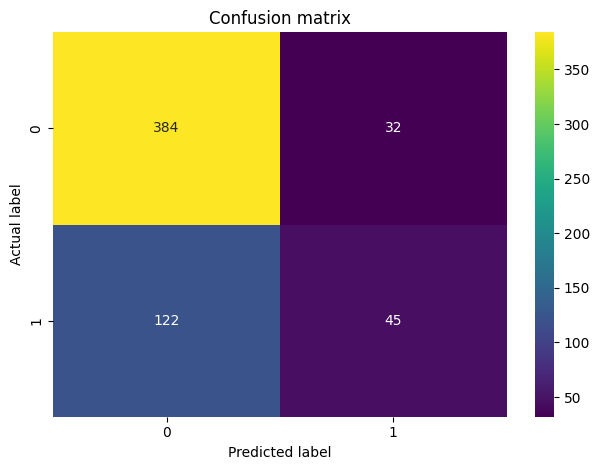

        Metrics
Error rate     0.264151
Accuracy       0.735849
Loss           0.513336
Sensitivity    0.269461
Specificity    0.923077
Precision      0.584416
FPR            0.076923
MCC            0.257099
F score        0.368852
dtype: float64


In [2]:
#!/usr/bin/python3

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from math import sqrt


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    import tensorflow as tf
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import to_categorical
    from tensorflow.keras.preprocessing.text import Tokenizer

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/datasets_2607_4342_indian_liver_patient_labelled.csv')

# preprocessing
headers = list(data.columns)
headers.remove('Dataset')
for col in data.columns:
    data[col] = data[col].fillna(0)
data = pd.concat([data, pd.get_dummies(data['Gender'], prefix='Gender')], axis=1)
headers.remove('Gender')

data['Dataset'] = data['Dataset'].replace([1], 0)
data['Dataset'] = data['Dataset'].replace([2], 1)


# creating input features and labels
X = data[headers]
Y_numeric = data[['Dataset']]
Y = to_categorical(data[['Dataset']])
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# encoded_Y = to_categorical(encoded_Y)

# building model
model = Sequential()
input_dims = X.shape  # should be (583, 10)
model.add(Dense(10, activation='relu', input_dim=input_dims[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fitting model on data
history = model.fit(X, Y, epochs=100, batch_size=10, validation_split=0.2)

# evaluating the model
loss, accuracy = model.evaluate(X, Y)
print('Loss on training data: %.2f' % (loss))
print('Accuracy on training data: %.2f' % (accuracy * 100))

# inspecting model
print(model.summary())

# print model history keys for debugging
# print(history.history.keys())

# create accuracy plots
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy.png')
# plt.show()

# create loss plots
plt.figure()
ax2 = plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss.png')
# plt.show()


# obtain confusion matrix
predicted_probabilities = model.predict(X)
prediction = np.argmax(predicted_probabilities, axis=1)
conf_matrix = confusion_matrix(Y_numeric, prediction)
print('Confusion Matrix')
print(conf_matrix)
(tn, fp), (fn, tp) = conf_matrix

# plot confusion matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="viridis", fmt='g')
ax.xaxis.set_label_position("bottom")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('Confusion_matrix.png')
plt.show()

# calculating more metrics
error_rate = (fp + fn) / (tp + tn + fp + fn)
accuracy = 1 - error_rate
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
false_positive_rate = fp / (tn + fp)
mcc = ((tp * tn) - (fp * fn)) / (sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))
beta = 1
f_score = ((1 + beta * beta) * (precision * sensitivity)) / (beta * beta * precision + sensitivity)
metrics = {'Error rate': error_rate, "Accuracy": accuracy, "Loss": loss,
           "Sensitivity": sensitivity, "Specificity": specificity, "Precision": precision, "FPR": false_positive_rate,
           "MCC": mcc, "F score": f_score}

print('=========================')
print("        Metrics")
print('=========================')
# print(pd.DataFrame(metrics, index=[0]).T)
print(pd.Series(metrics).T)